In [279]:
import numpy as np
import seaborn as sns
import random as random
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [280]:
#Next project: Consider three positive charges at three corners of an equilateral triangle. 
#Make a contour plot and heatmap of their equipotential surfaces.

In [281]:
# https://seaborn.pydata.org/examples/index.html

In [282]:
# k=1,d=1,q=1

In [283]:
Xx=int(input("Enter the x-coordinate of first point as:"))
Xy=int(input("Enter the y-coordinate of first point as:"))
d=int(input("Enter the side length d:"))

Enter the x-coordinate of first point as:3
Enter the y-coordinate of first point as:3
Enter the side length d:1


In [284]:
## Drawing the equilateral triangle

X=[Xx,Xy]
def EqT(X,d):
    Y=[Xx+d,Xy]
    M = [(Xx+Y[0])/2, (Xy+Y[1])/2 ]           # Mid point
    O = [(Xx-M[0])*3**0.5, (Xy-M[1])*3**0.5]  # Map to origin, multiply sqrt(3)
    M[0]+O[1],M[1]-O[0]                        # Rotate 90 (y,-x), map back
    Z= [M[0]-O[1], (M[1]+O[0])]                     # Rotate -90 (-y,x), map back
    return Y,Z
Y,Z=EqT(X,d)
print("The first point on the equilateral triangle was entered as",X)
print("The second point on the equilateral triangle is",Y)
print("The third point on the equilateral triangle is",Z)

The first point on the equilateral triangle was entered as [3, 3]
The second point on the equilateral triangle is [4, 3]
The third point on the equilateral triangle is [3.5, 2.1339745962155616]


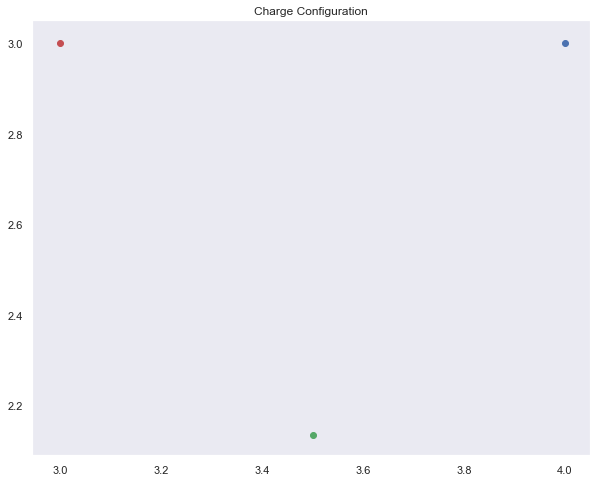

In [285]:
list=[X,Y,Z]
col=['r','b','g']
plt.figure(figsize=(10,8))
plt.title(label="Charge Configuration", loc='center')
a=0
for item in list:
    plt.scatter(item[0],item[1],c=col[a])
    a=a+1
plt.grid()

In [286]:
X,Y,Z

([3, 3], [4, 3], [3.5, 2.1339745962155616])

In [287]:
X[0],X[1]

(3, 3)

In [288]:
#Charges
qx=1
qy=1
qz=1

In [289]:
class Charge:
    
    def __init__(self, q, pos):
        self.q = q
        self.pos = pos
        
        
    def line(self, x,y):
        #create a vector from charge to observation point
        self.vector = [x-self.pos[0],y-self.pos[1]]
        #norm of the vector
        self.norm = np.sqrt((self.vector[0])**2+(self.vector[1])**2)
        
    
    def V_point_charge(self, x, y):
        #recall length
        self.line(x,y)
        
        if self.norm > 0:
            self.V = self.q/self.norm
            
        #if length is zero, set V equal to 0
        elif self.norm == 0:
            self.V = 0
            
        return self.V
    

In [290]:
eqch=[Charge(qx,X),Charge(qy,Y),Charge(qz,Z)] 
eqch

In [291]:
#Total potential at a point(x,y) due to charges
def V_total(x, y, charges):
    V = 0
    for C in charges:
        Vp = C.V_point_charge(x, y)
        V  = V+Vp
    return V

In [292]:
#Total potential at (1.7,1.8) due to charges 
V_total(x=1.7, y=1.8, charges = eqch)

1.4969379972714685

In [301]:
#Electric potential at different points on 2D grid
'''Create X and Y coordinates'''
Xp = np.arange(X[0]-d,Y[0]+d,0.1)
Yp = np.arange(X[1]-1.5*d,X[1]+1.5*d,0.1)

'''Initiate vacant V-list of list'''
V = [[0.0 for i in range(len(Xp))] for j in range(len(Yp))]

'''Calculate Electric potential at each pair of x,y coordinates'''
for i,x in enumerate(Xp):
    for j,y in enumerate(Yp):
        v = V_total(x, y,charges=eqch)
        V[j][i] = v    #Transpose


# Contour plot

In [302]:
'''fig, ax = plt.subplots()
CS = ax.contour(Xp, Yp, V)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')'''

"fig, ax = plt.subplots()\nCS = ax.contour(Xp, Yp, V)\nax.clabel(CS, inline=1, fontsize=10)\nax.set_title('Simplest default with labels')"

In [303]:
lvls=[2,3,4,5,6,8,10,12]

'plt.set_xticklabels(np.)\nplt.set_yticks([-1,0,1])'

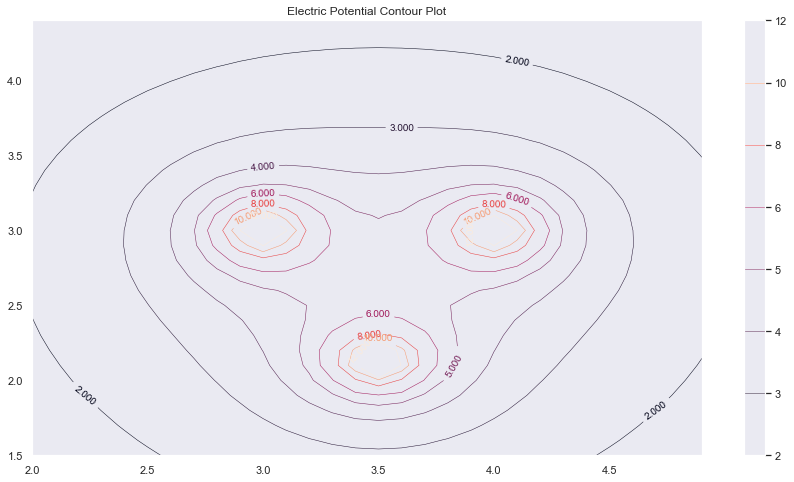

In [304]:
#Matplotlib contour plot
plt.figure(figsize = [15,8])
CS= plt.contour(Xp,Yp,V,linewidths=0.5,levels=lvls)
# Label contours
plt.clabel(CS, inline=1, fontsize=10)#,manual=[(1.5,1.5),(1.5,1),(2.25,0.5),(2.65,0.5),(2.5,1.5),(2,2),(3,2)])
plt.colorbar(ticks=lvls, orientation='vertical')
plt.grid()
plt.title('Electric Potential Contour Plot')
'''plt.set_xticklabels(np.)
plt.set_yticks([-1,0,1])'''

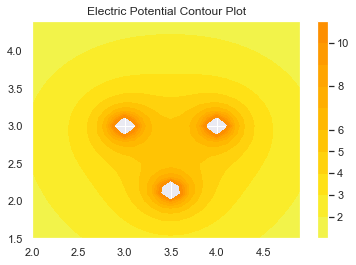

In [305]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(Xp, Yp, V,levels=np.arange(1,12,1),vmin=0, vmax=12.0,cmap='Wistia')
fig.colorbar(cp,ticks=lvls, orientation='vertical') # Add a colorbar to a plot
ax.set_title('Electric Potential Contour Plot')
#ax.set_xlabel('x (cm)')
#ax.set_ylabel('y (cm)')
#ax.set_xticklabels([0.5,1,1.5,2,2.5,3,3.5])
#ax.set_yticklabels([1,1.5,2,2.5,3,3.5,4][::-1])
plt.show()

In [306]:
type(V)            # we need to convert it to array before drawing heatmap

list

In [307]:
#V

# Heatmap

In [308]:
#Setting up the axis labels
Xticks=[1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
       1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05,
       2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 ,
       2.65, 2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15,
       3.2 , 3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 ,
       3.75, 3.8 , 3.85, 3.9 , 3.95]

#we can do Xticks[::-1]to reverse the Xticks list, creating a copy


In [309]:
X,Y,Z

([3, 3], [4, 3], [3.5, 2.1339745962155616])

In [310]:
#Charges
qx=1
qy=1
qz=1

In [311]:
eqch=[Charge(qx,X),Charge(qy,Y),Charge(qz,Z)] 
eqch

In [312]:
#Total potential at (1.7,1.8) due to charges 
V_total(x=1.7, y=1.8, charges = eqch)

1.4969379972714685

In [315]:
#Electric potential at different points on 2D grid
'''Create X and Y coordinates'''
Xp = np.arange(X[0]-d,Y[0]+d,0.05)
Yp = np.arange(X[1]-1.5*d,X[1]+1.5*d,0.05)

'''Initiate vacant V-list of list'''
V = [[0.0 for i in range(len(Xp))] for j in range(len(Yp))]

'''Calculate Electric potential at each pair of x,y coordinates'''
for i,x in enumerate(Xp):
    for j,y in enumerate(Yp):
        v = V_total(x, y,charges=eqch)
        V[j][i] = v    #Transpose


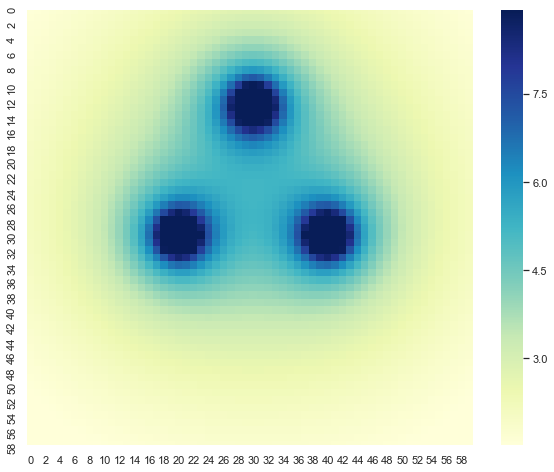

In [316]:
V = np.array(V)
plt.figure(figsize = [10,8])
sns.heatmap(V,annot=False,robust=True,cmap='YlGnBu')#,xticklabels=Xticks)#,yticklabels=Yticks)

plt.show()

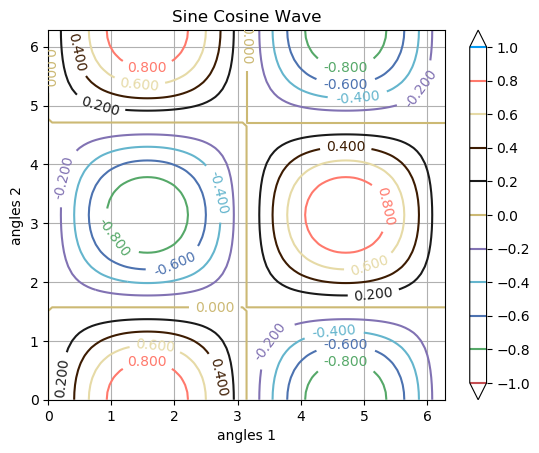

In [83]:
# %load contour.py
# Matplotlib Plotting Tutorials
# Contour/contourf Plot

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('default')

n1 = 101
n2 = 51

x1 = np.linspace(0, 2.0*np.pi, n1)
x2 = np.linspace(0, 2.0*np.pi, n2)

X1, X2 = np.meshgrid(x1, x2)

Z = np.sin(X1)*np.cos(X2)

breaks = np.linspace(-1, 1, 11)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

plt.figure()
CS1 = plt.contour(x1, x2, Z,
                 breaks,
                 # cmap='seismic',
                 # colors='k',
                 colors=('r', 'g', 'b', 'c', 'm', 'y', 'k', 'xkcd:chocolate', 'xkcd:beige', 'xkcd:salmon', 'xkcd:azure'),
                 extend='both', vmin=-1.0, vmax=1.0
                 )
plt.colorbar(ticks=breaks, orientation='vertical')
plt.clabel(CS1, inline=1, fontsize=10,
                # manual = manual_locations, # Pass a list of tuples for coordinates of labels
                )
plt.xlabel('angles 1')
plt.ylabel('angles 2')
plt.grid()
plt.title('Sine Cosine Wave')
plt.show()